## Image Gradients
An image gradient is a vector pointing in the direction of the most rapid increase in intensity or color. The magnitude of the gradient indicates how steep the change is, while the direction of the gradient shows the angle at which the change occurs.

Image gradients are a fundamental building block of many computer vision and image processing routines.

- We use gradients for detecting edges in images, which allows us to find contours and outlines of objects in images
- We use them as inputs for quantifying images through feature extraction — in fact, highly successful and - well-known image descriptors such as Histogram of Oriented Gradients and SIFT are built upon image gradient representations
- Gradient images are even used to construct saliency maps, which highlight the subjects of an image

While image gradients are not often discussed in detail since other, more powerful and interesting methods build on top of them, we are going to take the time and discuss them in detail.

For more details, [Click here](https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/)

## Gradient Calculation using Sobel and Scharr Filter

Let’s look at how we can approximate them using kernels, which will give us a tremendous boost in speed. Just like we used kernels to smooth and blur an image, we can also use kernels to compute our gradients.

We’ll start off with the Sobel method or Sobel filter, which actually uses two kernels/filters: one for detecting horizontal changes in direction and the other for detecting vertical changes in direction:

$$ G_{x} = \begin{bmatrix}-1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1\end{bmatrix} \quad \text{and} \quad G_{y} = \begin{bmatrix}-1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1\end{bmatrix} $$

Given an input image neighborhood below, let’s compute the Sobel approximation to the gradient:
$$ I_{i,j} = \begin{bmatrix}93 & 139 & 101 \\ 26 & 252 & 196 \\ 135 & 230 & 18\end{bmatrix} $$

Therefore:

$$G_{x} = \sum\begin{bmatrix}-1 \times 93 & 0 \times 139 & 1 \times 101 \\ -2 \times 26 & 0 \times 252 & 2 \times 196 \\ -1 \times 135 & 0 \times 230 & 1 \times 18\end{bmatrix} = \sum\begin{bmatrix}-93 & 0 & 101 \\ -52 & 0 & 392 \\ -135 & 0 & 18\end{bmatrix} = 231$$

and:

$$G_{y} = \sum\begin{bmatrix}-1 \times 93 & -2 \times 139 & -1 \times 101 \\ 0 \times 26 & 0 \times 252 & 0 \times 196 \\ 1 \times 135 & 2 \times 230 & 1 \times 18\end{bmatrix}$$

$$= \sum\begin{bmatrix}-93 & -278 & -101 \\ 0 & 0 & 0 \\ 135 & 460 & 18\end{bmatrix} = 141$$

Given these values of Gx and Gy, it would then be trivial to compute the gradient magnitude G and orientation ?:

$$G = \sqrt{231^{2} + 141^{2}} = 270.63 \quad \text{and} \quad \theta = \text{arctan2}(141, 231) \times \displaystyle\frac{180}{\pi} = 31.4^{\circ}$$

We could also use the Scharr kernel instead of the Sobel filter which may give us better approximations to the gradient:

$$G_{x} = \begin{bmatrix}+3 & 0 & -3 \\ +10 & 0 & -10 \\ +3 & 0 & -3\end{bmatrix} \quad \text{and} \quad G_{y} = \begin{bmatrix}+3 & +10 & +3 \\ 0 & 0 & 0 \\ -3 & -10 & -3\end{bmatrix}$$

The exact reasons as to why the Scharr kernel could lead to better approximations are heavily rooted in mathematical details and are well outside our discussion of image gradients.

If you’re interested in reading more about the Scharr versus Sobel filters and constructing an optimal image gradient approximation (and can read German), I would suggest taking a look at Scharr’s dissertation on the topic.

Overall, gradient magnitude and orientation make for excellent features and image descriptors when quantifying and abstractly representing an image.

But for edge detection, the gradient representation is extremely sensitive to local noise. We’ll need to add in a few more steps to create an actual robust edge detector — we’ll be covering these steps in detail in the next tutorial where we review the Canny edge detector.

## Imports

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

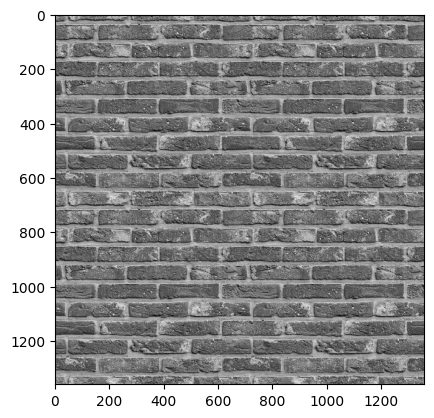

In [41]:
img_path = "./images/brick.jpg"
img_path2 = "./images/coins.JPG"

image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

**For SOBEL**

In [42]:
ksize = 3
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

In [43]:
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)


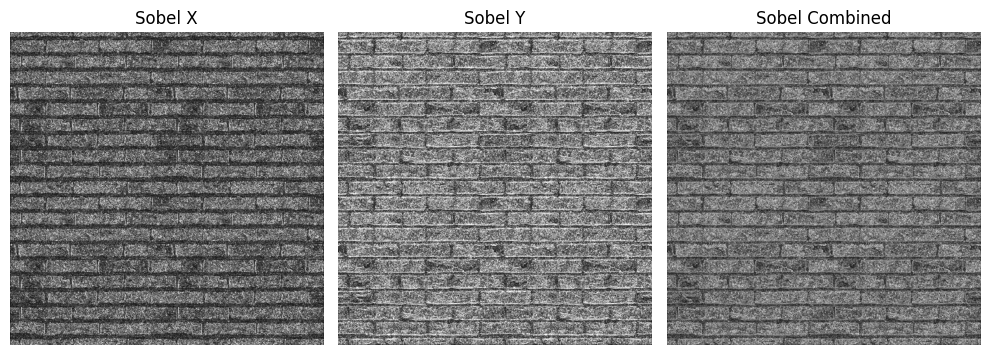

In [44]:
# Set up the figure and subplots
plt.figure(figsize=(10, 4))

# Display Sobel X
plt.subplot(1, 3, 1)
plt.imshow(gX, cmap='gray')
plt.title("Sobel X")
plt.axis("off")  # Hide axis ticks

# Display Sobel Y
plt.subplot(1, 3, 2)
plt.imshow(gY, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")  # Hide axis ticks

# Display Sobel Combined
plt.subplot(1, 3, 3)
plt.imshow(combined, cmap='gray')
plt.title("Sobel Combined")
plt.axis("off")  # Hide axis ticks

# Show the images
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

**For SCHARR**

In [45]:
ksize = -1
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

In [46]:
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)


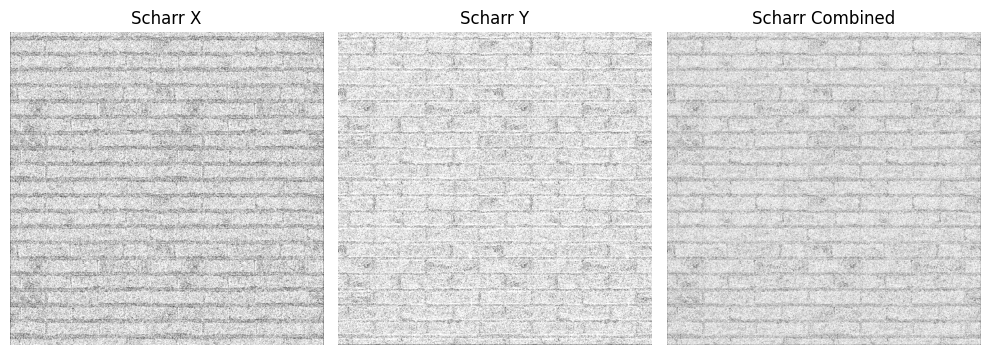

In [47]:
# Set up the figure and subplots
plt.figure(figsize=(10, 4))

# Display Scharr X
plt.subplot(1, 3, 1)
plt.imshow(gX, cmap='gray')
plt.title("Scharr X")
plt.axis("off")  # Hide axis ticks

# Display Scharr Y
plt.subplot(1, 3, 2)
plt.imshow(gY, cmap='gray')
plt.title("Scharr Y")
plt.axis("off")  # Hide axis ticks

# Display Scharr Combined
plt.subplot(1, 3, 3)
plt.imshow(combined, cmap='gray')
plt.title("Scharr Combined")
plt.axis("off")  # Hide axis ticks

# Show the images
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

## Computing gradient magnitude and orientation with OpenCV

Up until this point, we’ve learned how to compute the Sobel Filter and Scharr operator, but we don’t have much of an intuition as to what these gradients actually represent.

In this section, we are going to compute the gradient magnitude and gradient orientation of our input grayscale image and visualize the results. Then, in the next section, we’ll review these results, allowing you to obtain a deeper understanding of what gradient magnitude and orientation actually represent.

In [48]:
# load the input image and convert it to grayscale
image = cv2.imread(img_path2)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute gradients along the x and y axis, respectively
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

# compute the gradient magnitude and orientation
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

In [49]:
print(magnitude.shape)
print(orientation.shape)

(1200, 1600)
(1200, 1600)


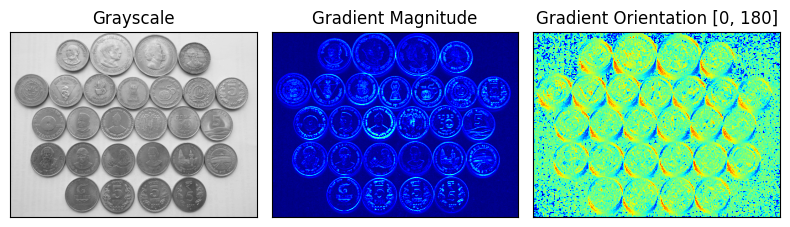

In [50]:
# initialize a figure to display the input grayscale image along with
# the gradient magnitude and orientation representations, respectively
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")
# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

On the left, we have our original input image of coins.

The middle displays the gradient magnitude using the Jet colormap.

Values that are closer to the blue range are very small. For example, the background of the image has a gradient of 0
because there is no gradient there.

Values that are closer to the yellow/red range are quite large (relative to the rest of the values). Taking a look at the outlines/borders of the coins you can see that these pixels have a large gradient magnitude due to the fact that they contain edge information.

Finally, the image on the right displays the gradient orientation information, again using the Jet colormap.

Values here fall into the range [0, 180], where values closer to zero show as blue and values closer to 180 as red. Note that much of the orientation information is contained within the coin itself.